In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
from get_processed_data import get_processed_data
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids, NearMiss
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
from tensorflow import keras
from sampling import undersample, oversample, smote, ncr
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, roc_curve, auc, confusion_matrix,
    roc_auc_score, precision_recall_curve
)

### Splitting data

In [13]:
df4, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()
# X_train.to_csv(r"C:\Users\760421\Downloads\P_FAILING_HEAD.csv", index=False)


Training set shape: (12335, 55) (12335,)
Validation set shape: (1542, 55) (1542,)
Test set shape: (1542, 55) (1542,)


In [14]:
input_size = X_train.shape[1]  # Number of features in the input layer
output_size = 1  # For binary classification

# Choose the number of neurons for the hidden layer
hidden_layer_neurons = int((input_size + output_size) / 2)
hidden_layer_neurons


28

In [15]:
# def ann():
#     model = keras.Sequential([
#     layers.Dense(28, activation='relu', input_shape=(55,)),
#     # layers.Dense(10, activation='relu'),
#     layers.Dense(1, activation='sigmoid')
#     ])
   
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     return model

def ann(optimizer='adam', activation='relu', dropout_rate=0.0, hidden_units=16, learning_rate=0.01):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_units, activation=activation, input_shape=(55,)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_ann(X_train, y_train, X_test, y_test, sampling_technique,class_weights=None,param_grid=None):

    # model = KerasClassifier(build_fn=ann, epochs=10)
    model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.0, 
                            hidden_units=16, learning_rate=0.01, batch_size=32, epochs=30)
    # model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.1, 
    #                         hidden_units=32, learning_rate=0.1, batch_size=32, epochs=40)

    model.fit(X_train, y_train, class_weight=class_weights)
    # model.fit(X_train, y_train, epochs=30, batch_size=32,class_weight=class_weights)
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    Recall = round(recall_score(y_test, y_pred)*100,2)
    Precision = round(precision_score(y_test, y_pred)*100,2)
    f1 = round(f1_score(y_test, y_pred)*100,2)
    accuracy = round(accuracy_score(y_test, y_pred)*100,2)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
386/386 [==============================] - 2s 3ms/step - loss: 0.6213 - accuracy: 0.9064
Epoch 2/30
386/386 [==============================] - 1s 3ms/step - loss: 0.3066 - accuracy: 0.9340
Epoch 3/30
386/386 [==============================] - 1s 2ms/step - loss: 0.2670 - accuracy: 0.9364
Epoch 4/30
386/386 [==============================] - 1s 3ms/step - loss: 0.2496 - accuracy: 0.9377
Epoch 5/30
386/386 [==============================] - 1s 2ms/step - loss: 0.2568 - accuracy: 0.9380
Epoch 6/30
386/386 [==============================] - 1s 3ms/step - loss: 0.2529 - accuracy: 0.9366
Epoch 7/30
386/386 [==============================] - 1s 3ms/step - loss: 0.2398 - accuracy: 0.9364
Epoch 8/30
386/386 [==============================] - 1s 3ms/step - loss: 0.2400 - accuracy: 0.9368
Epoch 9/30
386/386 [==============================] - 1s 3ms/step - loss: 0.2887 - accuracy: 0.9315
Epoch 10/30
386/386 [==============================] - 1s 3ms/step - loss: 0.2697 - accuracy: 0.9319

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

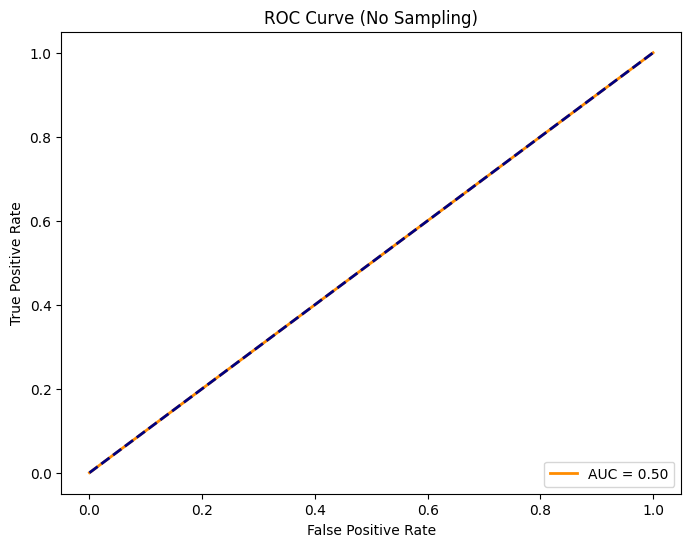

Epoch 1/30


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 2s 2ms/step - loss: 0.2906 - accuracy: 0.8849
Epoch 2/30
726/726 [==============================] - 2s 2ms/step - loss: 0.1639 - accuracy: 0.9398
Epoch 3/30
726/726 [==============================] - 2s 2ms/step - loss: 0.1469 - accuracy: 0.9443
Epoch 4/30
726/726 [==============================] - 2s 2ms/step - loss: 0.1401 - accuracy: 0.9458
Epoch 5/30
726/726 [==============================] - 2s 2ms/step - loss: 0.1349 - accuracy: 0.9482
Epoch 6/30
726/726 [==============================] - 2s 2ms/step - loss: 0.1319 - accuracy: 0.9506
Epoch 7/30
726/726 [==============================] - 2s 2ms/step - loss: 0.1287 - accuracy: 0.9507
Epoch 8/30
726/726 [==============================] - 2s 2ms/step - loss: 0.1263 - accuracy: 0.9517
Epoch 9/30
726/726 [==============================] - 2s 2ms/step - loss: 0.1244 - accuracy: 0.9519
Epoch 10/30
726/726 [==============================] - 2s 2ms/step - loss: 0.1228 - accuracy: 0.9524
Epoch 11/3

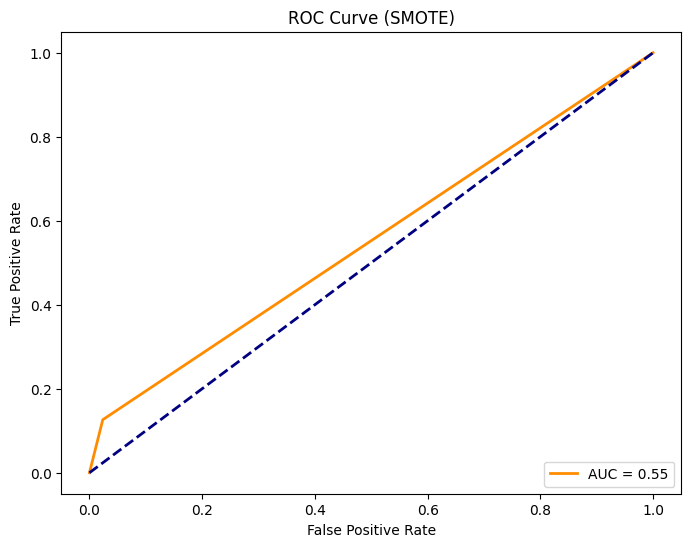

Epoch 1/30


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 3s 3ms/step - loss: 0.5475 - accuracy: 0.7198
Epoch 2/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4652 - accuracy: 0.7790
Epoch 3/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4363 - accuracy: 0.7933
Epoch 4/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4189 - accuracy: 0.8038
Epoch 5/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4061 - accuracy: 0.8123
Epoch 6/30
726/726 [==============================] - 2s 3ms/step - loss: 0.3963 - accuracy: 0.8172
Epoch 7/30
726/726 [==============================] - 2s 2ms/step - loss: 0.3871 - accuracy: 0.8235
Epoch 8/30
726/726 [==============================] - 2s 2ms/step - loss: 0.3794 - accuracy: 0.8324
Epoch 9/30
726/726 [==============================] - 2s 2ms/step - loss: 0.3729 - accuracy: 0.8343
Epoch 10/30
726/726 [==============================] - 2s 3ms/step - loss: 0.3675 - accuracy: 0.8382
Epoch 11/3

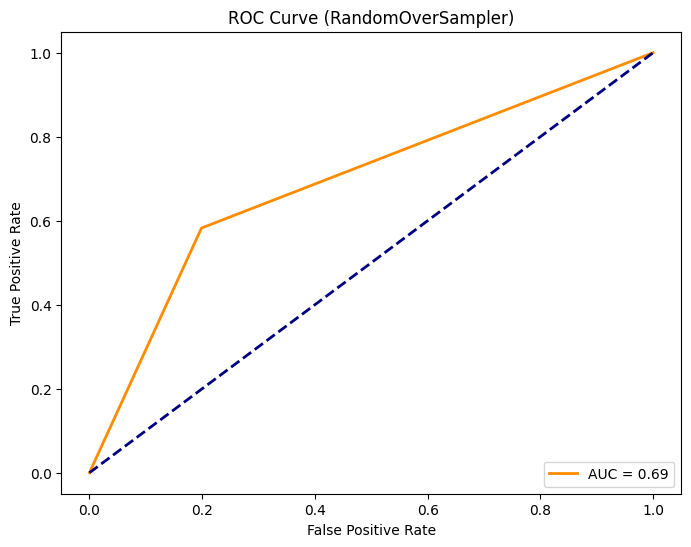

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
46/46 [==============================] - 1s 3ms/step - loss: 0.7038 - accuracy: 0.5808
Epoch 2/30
46/46 [==============================] - 0s 3ms/step - loss: 0.6334 - accuracy: 0.6561
Epoch 3/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5921 - accuracy: 0.6975
Epoch 4/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5634 - accuracy: 0.7272
Epoch 5/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5419 - accuracy: 0.7410
Epoch 6/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5242 - accuracy: 0.7535
Epoch 7/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5093 - accuracy: 0.7700
Epoch 8/30
46/46 [==============================] - 0s 3ms/step - loss: 0.4959 - accuracy: 0.7728
Epoch 9/30
46/46 [==============================] - 0s 3ms/step - loss: 0.4840 - accuracy: 0.7880
Epoch 10/30
46/46 [==============================] - 0s 2ms/step - loss: 0.4737 - accuracy: 0.7838
Epoch 11/30
46/46 [

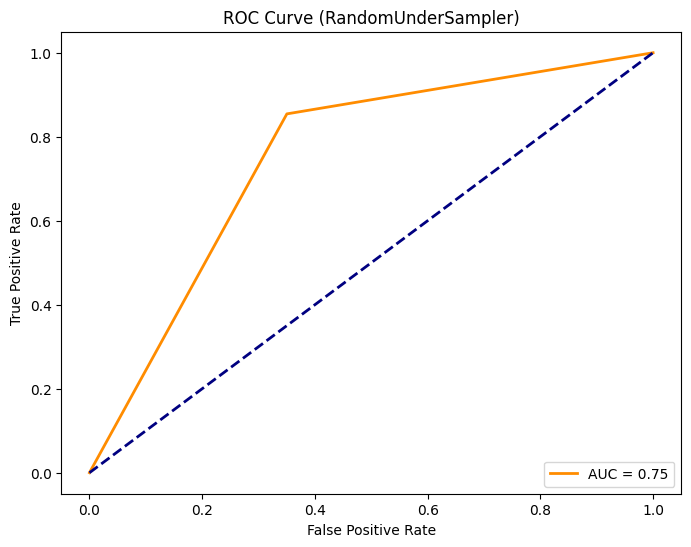

Epoch 1/30


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


331/331 [==============================] - 2s 3ms/step - loss: 0.3871 - accuracy: 0.8652
Epoch 2/30
331/331 [==============================] - 1s 2ms/step - loss: 0.2283 - accuracy: 0.9308
Epoch 3/30
331/331 [==============================] - 1s 2ms/step - loss: 0.2135 - accuracy: 0.9307
Epoch 4/30
331/331 [==============================] - 1s 2ms/step - loss: 0.2068 - accuracy: 0.9313
Epoch 5/30
331/331 [==============================] - 1s 2ms/step - loss: 0.2033 - accuracy: 0.9314
Epoch 6/30
331/331 [==============================] - 1s 2ms/step - loss: 0.2003 - accuracy: 0.9306
Epoch 7/30
331/331 [==============================] - 1s 3ms/step - loss: 0.1975 - accuracy: 0.9308
Epoch 8/30
331/331 [==============================] - 1s 2ms/step - loss: 0.1952 - accuracy: 0.9308
Epoch 9/30
331/331 [==============================] - 1s 3ms/step - loss: 0.1933 - accuracy: 0.9311
Epoch 10/30
331/331 [==============================] - 1s 2ms/step - loss: 0.1914 - accuracy: 0.9307
Epoch 11/3

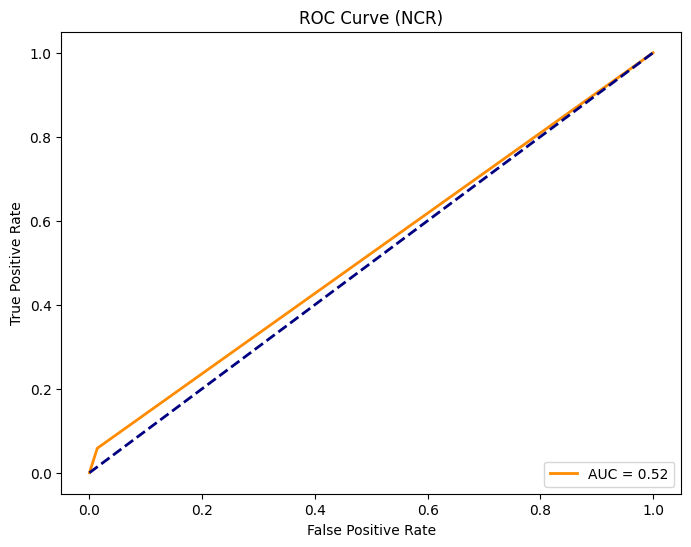

In [16]:
results = {}
scaler = StandardScaler()
#No Sampling
metrics = train_ann(X_train,y_train,X_test,y_test,'No Sampling')
results[metrics[0]] = metrics[1:]

# smote = SMOTE(random_state=42)
# X_smote, y_smote = smote.fit_resample(X_train, y_train)
X_smote, y_smote = smote(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_smote)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann(X_train_scaled, y_smote, X_test_scaled, y_test,'SMOTE')
results[metrics[0]] = metrics[1:]

# ros = RandomOverSampler(random_state=42)
# X_over, y_over = ros.fit_resample(X_train, y_train)
X_over, y_over = oversample(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_over)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann(X_train_scaled, y_over, X_test_scaled, y_test,'RandomOverSampler')
results[metrics[0]] = metrics[1:]


# rus = RandomUnderSampler(random_state=42)
# X_under, y_under = rus.fit_resample(X_train, y_train)
X_under, y_under = undersample(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_under)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann(X_train_scaled, y_under, X_test_scaled, y_test,'RandomUnderSampler')
results[metrics[0]] = metrics[1:]

# X_ncr, y_ncr = ncr(X_train, y_train)
# metrics = train_ann(X_ncr, y_ncr, X_test, y_test,'NCR')
# results[metrics[0]] = metrics[1:]
X_ncr, y_ncr = ncr(X_train, y_train)
X_train_scaled = scaler.fit_transform(X_ncr)
X_test_scaled = scaler.transform(X_test)
metrics = train_ann(X_train_scaled, y_ncr, X_test_scaled, y_test,'NCR')
results[metrics[0]] = metrics[1:]

In [17]:
sampling_techniques = list(results.keys())
metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
sorted_df = results_df.sort_values(by=['F1 Score', 'Precision', 'Recall', 'Accuracy'], ascending=False)
sorted_df

,Recall,Precision,F1 Score,Accuracy
RandomOverSampler,58.25,17.34,26.73,78.66
RandomUnderSampler,85.44,14.86,25.32,66.34
SMOTE,12.62,27.66,17.33,91.96
NCR,5.83,23.08,9.30,92.41
No Sampling,0.00,0.00,0.00,93.32


```Hyper-Parameter Tuning```

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define the function to create the model
def create_model(optimizer='adam', activation='relu', dropout_rate=0.0, hidden_units=16, learning_rate=0.01):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_units, activation=activation, input_shape=(55,)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier for use in GridSearchCV
model = KerasClassifier(build_fn=ann, epochs=10, batch_size=32, verbose=0,activation = "relu", 
                        dropout_rate=0,hidden_units=16, learning_rate=0.01)

# Define the hyperparameters to tune
param_grid = {
    'optimizer': ['adam'],  # Optimizer choices
    'activation': ['relu', 'sigmoid'],  # Activation functions
    'hidden_units': [16, 32],  # Number of neurons in the hidden layer(s)
    'learning_rate': [0.01, 0.1],  # Learning rate for the optimizer
    'batch_size': [32],  # Batch size for training
    'epochs': [20, 30],  # Number of training epochs
    'dropout_rate': [0.0, 0.1],
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(f1_score), cv=3)
grid_result = grid.fit(X_over, y_over)

# Print the best parameters and accuracy
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point u

KeyboardInterrupt: 